# Factors Affecting GDP Data Analysis
__Cam Fraser__ <br>
_27/05/2022 - 08/05/2022_

1. show trends of gdp over time

2. model with factors affecting gdp

* Recession factors

    * bank lending
    * output rates
    * unemployment
    * inflation rate
* Wages
* new technologies
* Workforce skills
* public sector investment


In [572]:
import numpy as np
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
from matplotlib import figure
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [538]:
uk_labour_prod = pd.read_excel("/Users/cameronfraser/CodeClan/producivity_&_gdp_project/raw_data/data/Uk Labour Productivity - Time Series.xlsx", engine='openpyxl').iloc[6:]

uk_labour_prod.rename(columns={
    "Title": "year",
    "UK Whole Economy: Output per hour worked SA: Index 2016 = 100": "outputs_per_hours_worked",
    "Productivity jobs. Whole Economy SA: Index 2016=100: UK": "job_productivity"
}, inplace=True)

uk_labour_prod_annual = uk_labour_prod[~uk_labour_prod["year"].str.contains("Q")][:]
uk_labour_prod_annual = uk_labour_prod_annual[["year", "outputs_per_hours_worked", "job_productivity"]][:]

/Users/cameronfraser/opt/anaconda3/envs/python39/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [539]:
uk_public_servive_product_yearly =  pd.read_excel("/Users/cameronfraser/CodeClan/producivity_&_gdp_project/raw_data/data/UK Public Service Productivity.xlsx", engine='openpyxl', sheet_name="Annual PSP", header=[4,5])
uk_pub_sec_productivity =  uk_public_servive_product_yearly.iloc[0:21,[0,3]]

uk_pub_sec_productivity.columns=("year", "pub_sec_productivity")
#uk_pub_sec_productivity["year"].replace(to_replace=r'*',value=r"",inplace=True, regex=True)
uk_pub_sec_productivity.iloc[20,0] = 2017
uk_pub_sec_productivity

,year,pub_sec_productivity
0,1997,100.0
1,1998,101.1
2,1999,100.7
3,2000,99.7
4,2001,100.8
5,2002,99.0
6,2003,98.9
7,2004,99.2
8,2005,99.2
9,2006,100.3


uk_public_servive_product_yearly the column inputs marks the inputs into the public sector yearly which relaltes to the amount spent on infrastructure and workers in the public sector

In [540]:
uk_sick_days_annual = pd.read_excel("/Users/cameronfraser/CodeClan/producivity_&_gdp_project/raw_data/additional_data/UK Labour Market - Sickness and Absence.xlsx", engine='openpyxl', sheet_name="Table 1", header=4)

In [541]:
uk_education_rates = pd.read_excel("/Users/cameronfraser/CodeClan/producivity_&_gdp_project/raw_data/additional_data/Quality Adjusted Labour Input Dataset.xlsx", engine='openpyxl', sheet_name="Table 1", header=1).loc[73:78]
uk_education_rates.rename(columns={uk_education_rates.columns[0]: "qualifications"}, inplace=True)

uk_education_rates = uk_education_rates.transpose().copy()
uk_education_rates = uk_education_rates.rename(columns=uk_education_rates.iloc[0]).drop(uk_education_rates.index[0]).iloc[:,0]
uk_education_rates_df = pd.DataFrame({"year":uk_education_rates.index, "no_qualifications":uk_education_rates.values})
#uk_education_rates["year"] = uk_education_rates.index
uk_education_rates_df

,year,no_qualifications
0,1994,0.156235
1,1995,0.146578
2,1996,0.140136
3,1997,0.123368
4,1998,0.117012
5,1999,0.111471
6,2000,0.108283
7,2001,0.109031
8,2002,0.103925
9,2003,0.100532


In [542]:
uk_education_rates

1994    0.156235
1995    0.146578
1996    0.140136
1997    0.123368
1998    0.117012
1999    0.111471
2000    0.108283
2001    0.109031
2002    0.103925
2003    0.100532
2004    0.099192
2005    0.092178
2006    0.087618
2007    0.085218
2008    0.081242
2009    0.075273
2010    0.065521
2011    0.063416
2012    0.056178
2013    0.056179
2014    0.053827
2015    0.054824
2016    0.052062
2017    0.050395
Name: No qualifications , dtype: object

In [543]:
# Might not use this...

global_r_and_D_annual = pd.read_excel("/Users/cameronfraser/CodeClan/producivity_&_gdp_project/raw_data/additional_data/Cross country Gross Domestic Spending on R&D.xls")
uk_r_and_D_annual = global_r_and_D_annual[global_r_and_D_annual["LOCATION"] == "GBR"]
uk_r_and_D_annual =  uk_r_and_D_annual[global_r_and_D_annual["MEASURE"] == "MLN_USD"]
uk_r_and_D_annual = uk_r_and_D_annual.iloc[:,5:7].rename(columns={
    "TIME": "year",
    "Value":"gdp%_on_r_&_d"
}).reset_index(drop=True)
uk_r_and_D_annual

#uk_tech_development = pd.read_excel("/Users/cameronfraser/CodeClan/producivity_&_gdp_project/raw_data/additional_data/TechnologyByCountry.xls", header=3).loc[1029:1037].reset_index(drop=True).drop(columns="Indicator Code")

#uk_tech_development = uk_tech_development.transpose().iloc[2:]
#uk_tech_development.columns = uk_tech_development.iloc[0]
#pivot(index=uk_tech_development.columns(), columns={"Country Name", "Country Code", "Indicator Name"})
#uk_tech_development.drop(uk_tech_development.iloc[0])
#uk_tech_development.iloc[1:].reset_index().rename(columns={"index":"year"})

/var/folders/nr/2lvpnbdn1vb5_fbkj9m9jbh00000gn/T/ipykernel_50912/3716478981.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  uk_r_and_D_annual =  uk_r_and_D_annual[global_r_and_D_annual["MEASURE"] == "MLN_USD"]


,year,gdp%_on_r_&_d
0,1981,25228.638057
1,1983,24713.417905
2,1985,26656.863886
3,1986,27673.729543
4,1987,28042.995644
5,1988,28759.086939
6,1989,29387.702029
7,1990,29507.896086
8,1991,28058.762534
9,1992,27673.212415


In [544]:
uk_minimum_wages_series = pd.read_excel("/Users/cameronfraser/CodeClan/producivity_&_gdp_project/raw_data/additional_data/Real minimum wages OECD.xlsx", engine="openpyxl", sheet_name="USD PPP", header=5).iloc[26, 2:26]
# renaming and creating columns
# uk_minimum_wages["min_wages"] = uk_minimum_wages.iloc[:,0]
uk_minimum_wages_df = pd.DataFrame({'year':uk_minimum_wages_series.index, 'min_wages':uk_minimum_wages_series.values})

In [545]:
uk_gdp_estimates = pd.read_excel("/Users/cameronfraser/CodeClan/producivity_&_gdp_project/raw_data/data/UK GDP Estimates - Time Series.xlsx", header=0, engine='openpyxl').iloc[6:]

uk_gdp_estimates.rename(columns={
    "Title": "year",
    "Total gross final expenditure (aligned) - P.3+P.5+P.6 : CVM SA £m": "gov_consumption",
    "Household final consumption expenditure :National concept CVM SA - £m": "house_consumption",
    "Total Gross Fixed Capital Formation CVM SA £m": "investment",
    "Balance of Payments: Trade in Goods & Services: Total Balance: CVM SA £m": "net_exports",
    "Gross Domestic Product at market prices: Current price: Seasonally adjusted £m": "gdp"
}, inplace=True)


# Have to split this data up, as there is annual and quarterly data within it
uk_gdp_estimates_annual = uk_gdp_estimates[~uk_gdp_estimates["year"].str.contains("Q")][:]

predictors_for_gdp = uk_gdp_estimates_annual[["year", "gov_consumption", "house_consumption", "investment", "net_exports", "gdp"]][:]

/Users/cameronfraser/opt/anaconda3/envs/python39/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [546]:
global_finan_dev = pd.read_excel("/Users/cameronfraser/CodeClan/de13_classnotes/week_12/day_5/final_project_briefs/deloitte_gdp_project/data/Global Financial Development.xlsx", sheet_name="Data - July 2018", engine='openpyxl')

# renaming global finacial development columns for ease of use later on
global_finan_dev.rename(columns={
    "ny_gdp_pcap_kd": "gdp_per_capita",
    "ny_gdp_mktp_cd": "gdp",
    "sp_pop_totl": "population"
}, inplace=True)

# Impute gdp per capita if not there and then filter out any still not there
global_finan_dev["gdp_per_capita"].fillna(global_finan_dev["gdp"]/global_finan_dev["population"], inplace=True)

uk_total_glob_fin_dataset = global_finan_dev[global_finan_dev["country"] == "United Kingdom"]

uk_gdp_per_capita = uk_total_glob_fin_dataset.loc[:,("year", "gdp_per_capita")]

In [552]:
uk_education_rates_df

,year,no_qualifications
0,1994,0.156235
1,1995,0.146578
2,1996,0.140136
3,1997,0.123368
4,1998,0.117012
5,1999,0.111471
6,2000,0.108283
7,2001,0.109031
8,2002,0.103925
9,2003,0.100532


In [553]:
predictors_for_gdp["year"] = predictors_for_gdp["year"].astype(int)
uk_minimum_wages_df["year"] = uk_minimum_wages_df["year"].astype(int)
uk_r_and_D_annual["year"] = uk_r_and_D_annual["year"].astype(int)
uk_education_rates_df["year"] = uk_education_rates_df["year"].astype(int)
uk_education_rates_new = uk_education_rates_df.loc[:,["year", "no_qualifications"]][:]
uk_pub_sec_productivity["year"] = uk_pub_sec_productivity["year"].astype(int)
uk_labour_prod_annual["year"] = uk_labour_prod_annual["year"].astype(int)
uk_gdp_per_capita["year"] = uk_gdp_per_capita["year"].astype(int)

In [554]:
# Massive join

joined_gdp_predictors = uk_labour_prod_annual.merge(
    uk_r_and_D_annual, on="year").merge(
        uk_minimum_wages_df, on="year", how="left").merge(
            uk_pub_sec_productivity,on="year").merge(predictors_for_gdp, on="year").merge(uk_gdp_per_capita, on="year")
            #.merge(uk_labour_prod_annual, on="year")

                #uk_education_rates_df

                
joined_gdp_predictors = joined_gdp_predictors.dropna()
joined_gdp_predictors = joined_gdp_predictors.drop(columns={"investment", "gov_consumption", "house_consumption", "net_exports"})
#x "job_productivity" ,"gdp%_on_r_&_d", "year", "outputs_per_hours_worked", "no_qualifications", "pub_sec_productivity"

In [568]:
# set the response dataset 
response_var = joined_gdp_predictors["gdp_per_capita"][:]

# put our predictors in a data frame
predictor_vars = joined_gdp_predictors.drop(columns = {"gdp_per_capita", "gdp", "gdp%_on_r_&_d", "job_productivity", "pub_sec_productivity"})[:]

In [569]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(predictor_vars, response_var)

LinearRegression()

In [570]:
import statsmodels.api as sm

# add in the constant to the data
predictor_vars = sm.add_constant(predictor_vars)
predictor_vars.head()

,const,year,outputs_per_hours_worked,min_wages
3,1.0,2000,86.5,13009.611
4,1.0,2001,87.8,13470.878
5,1.0,2002,89.9,14444.703
6,1.0,2003,92.6,14766.797
7,1.0,2004,93.7,15635.764


In [571]:
sm_model = sm.OLS(response_var.astype(float), predictor_vars.astype(float)).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:         gdp_per_capita   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     21.81
Date:                Mon, 06 Jun 2022   Prob (F-statistic):           2.37e-05
Time:                        13:54:26   Log-Likelihood:                -135.71
No. Observations:                  17   AIC:                             279.4
Df Residuals:                      13   BIC:                             282.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

/Users/cameronfraser/opt/anaconda3/envs/python39/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Text(0, 0.5, 'Residual')

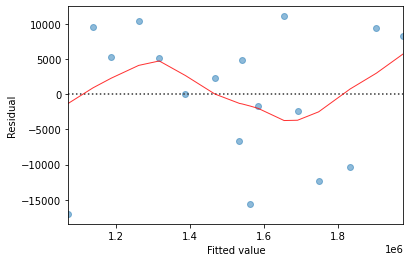

In [533]:
residuals = sm_model.fittedvalues - response_var

sns.residplot(x = sm_model.fittedvalues, y = residuals, # data to plot
                          lowess = True, # Fit a lowess smoother to the residual scatterplot
                          scatter_kws = {'alpha': 0.5}, # set the transparency of the scatter points
                          line_kws = {'color': 'red', 'lw': 1, 'alpha': 0.8}) # set the line colour/transparency
plt.xlabel("Fitted value")
plt.ylabel("Residual")